In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py

In [2]:
#for the needs of this project I imported only 25 out of 122 columns of this data set.

#country, year, carbonintensityelec, coal_production, electricity_generation, biofuel_electricity, coal_electricity, fossil_electricity, 
#gas_electricity, hydro_electricity, nuclear_electricity, oil_electricity, renewables_electricity, solar_electricity, wind_electricity, energypergdp
#energypercapita, fossilshareelec, gasshareelec, gas_production, lowcarbonshare_elec, oil_production, population, gdp


In [3]:
# importing dataframe from my virtual environment
DF = pd.read_csv("/home/hubert/Desktop/Energy_consumption/World Energy Consumption.csv")

#filter the columns described in no.2
DF = DF[['country','year','coal_production','electricity_generation','biofuel_electricity','coal_electricity',
         'fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity',
         'renewables_electricity','oil_production','population','gdp','solar_electricity','wind_electricity',
         'energy_per_gdp','energy_per_capita','fossil_share_elec','gas_share_elec','gas_production','low_carbon_share_elec']]

In [46]:
#getting the data till the year of 1990 & selecting some countries
#DF = DF[DF['year'] >= 1990]
#countries = ['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India']
#changing dataframe, so it has only the countries that I want
#DF = DF[DF['country'].isin(countries)]

In [47]:
#I'll try to see if theere is lacking data
nulls = DF.isna().sum()
nulls

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64

In [48]:
#so there is missing data, and for things such as GDP it makes no sense to replace NA with zero.
#better approach would be to fill the missing data with forward and backward fill

for a in nulls.index:
    if nulls[a] > 0:
        DF[a].ffill(inplace=True)
        DF[a].bfill(inplace=True)

DF.isna().sum()

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64

In [49]:
i=0
for col in DF.columns:
    i +=1
    print(f'{i}. {col}')

1. country
2. year
3. coal_production
4. electricity_generation
5. biofuel_electricity
6. coal_electricity
7. fossil_electricity
8. gas_electricity
9. hydro_electricity
10. nuclear_electricity
11. oil_electricity
12. renewables_electricity
13. oil_production
14. population
15. gdp
16. solar_electricity
17. wind_electricity
18. energy_per_gdp
19. energy_per_capita
20. fossil_share_elec
21. gas_share_elec
22. gas_production
23. low_carbon_share_elec


In [50]:
# I want to create a heatmap with european countries to see the the changes of the coal production.
# the countries that i am choosing -->
european_countries = ['Austria','Belgium','Czechia','Germany','Ireland','Italy','Portugal','Poland','Spain']
#quick check weather those countries are in my dataframe
unique_countries = DF['country'].unique()
#for a in unique_countries:
#    if a in european_countries:
#        print(a)
#everything seem 

<Axes: xlabel='year', ylabel='country'>

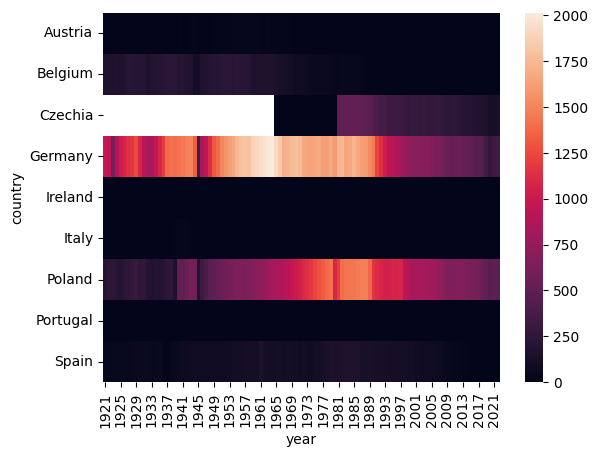

In [57]:
#now I'll create a new dataframe that contains only the countries that are in my 'european_countries list'
eu_df = DF[DF['country'].isin(european_countries)]
eu_df = eu_df[eu_df['year'] > 1920]
#now that I have created it, I can make the pivot
coal_eu = eu_df.pivot_table(index='country', columns='year', values='coal_production')
sns.heatmap(coal_eu)

In [58]:
#as we can observe, Poland and Germany were the main coal producers in those european countries
#also there is no data about Czechia producing its coal, however I I deciting not to fill it since it would not make much sense
#lets now create a charts with GDPs of those countries to see if there are some outliers

In [59]:
gdp_eu = eu_df.pivot_table(index='year', columns='country', values='gdp')

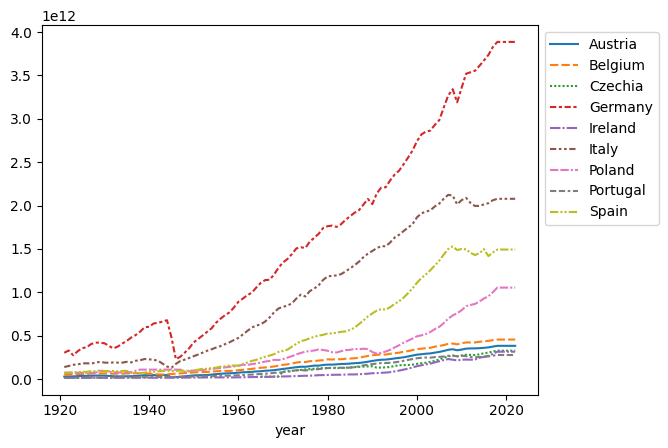

In [60]:
sns.lineplot(gdp_eu)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.72))
plt.show()

In [74]:
#as we can see there are 4 big outliers in the growth of the GPD
#which is Germany, Italy, Spain and Poland.
# ok, now that we have this, lets find out abou the eco-energy leaders
# I want to find out what are the top 5 countires when it comes to solar, hydro, wind ,and nuclear energy consumption (overall)
# ill consider only data from they year 2000, since not all countires have data before this year
# first thing to do is to filter only interesting columns
eco_energy = DF[['country','year', 'solar_electricity','hydro_electricity','wind_electricity','nuclear_electricity']]
eco_energy = eco_energy[eco_energy['year'] >= 2000]
resoult = eco_energy.groupby('country')